In [5]:
# 📦 Librerie principali
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Impostazioni di visualizzazione
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Carica il file Excel (modifica il path se necessario)
file_path = "../data/raw/Prodromal_Mondino_Icot.xlsx"
df = pd.read_excel(file_path, sheet_name="Foglio1")

# Copia di lavoro
df_clean = df.copy()

In [6]:
# Rimuove colonne identificative e prodromiche
id_cols = ['ID', 'Surname', 'Name', 'Center', 'Evaluation Date']
prodrome_cols = ['Constipation', 'Hyposmia', 'REM', 'Depression']

df_clean.drop(columns=id_cols + prodrome_cols, inplace=True, errors='ignore')

In [7]:
# Percentuale di valori NaN per colonna
nan_percent = df_clean.isna().mean().sort_values(ascending=False)

# Mostra le 10 variabili con più NaN
nan_percent.head(10)

Updrs-III                                                    0.181159
Duration (years)                                             0.065217
Onset (1=early (<49), 2= middle (5 2-69), 3=late (>7 2) )    0.057971
Age Onset                                                    0.057971
Stride Length                                                0.043478
H-Y                                                          0.032609
Double Support                                               0.032609
Gait Speed                                                   0.025362
Single Support                                               0.021739
Cadence                                                      0.018116
dtype: float64

In [8]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
HR V,276.0,2.076487,0.558636,0.823,1.690000,1.9930,2.46125,3.947000
HR ML,276.0,1.751538,0.397015,0.966,1.454381,1.7195,1.97075,2.916000
HR AP,276.0,1.989947,0.602998,0.818,1.520000,1.9490,2.33925,4.869000
%det V,276.0,56.375877,23.050632,1.354,37.002250,61.5615,73.76200,97.714000
%det ML,276.0,53.602894,24.638788,2.553,35.060250,55.6555,73.00800,98.522795
%det AP,276.0,51.469055,25.445665,3.927,26.809500,55.4940,72.37300,98.431143
"Sex (M=1, F=2)",276.0,1.123188,0.538724,0.000,1.000000,1.0000,1.00000,2.000000
Age,274.0,71.802920,7.378157,47.000,68.000000,72.0000,77.00000,89.000000
Heigth,276.0,133.666667,47.863493,47.000,78.000000,162.0000,172.00000,191.000000
Weigth,275.0,109.601818,46.018112,32.000,72.000000,85.0000,163.00000,190.000000


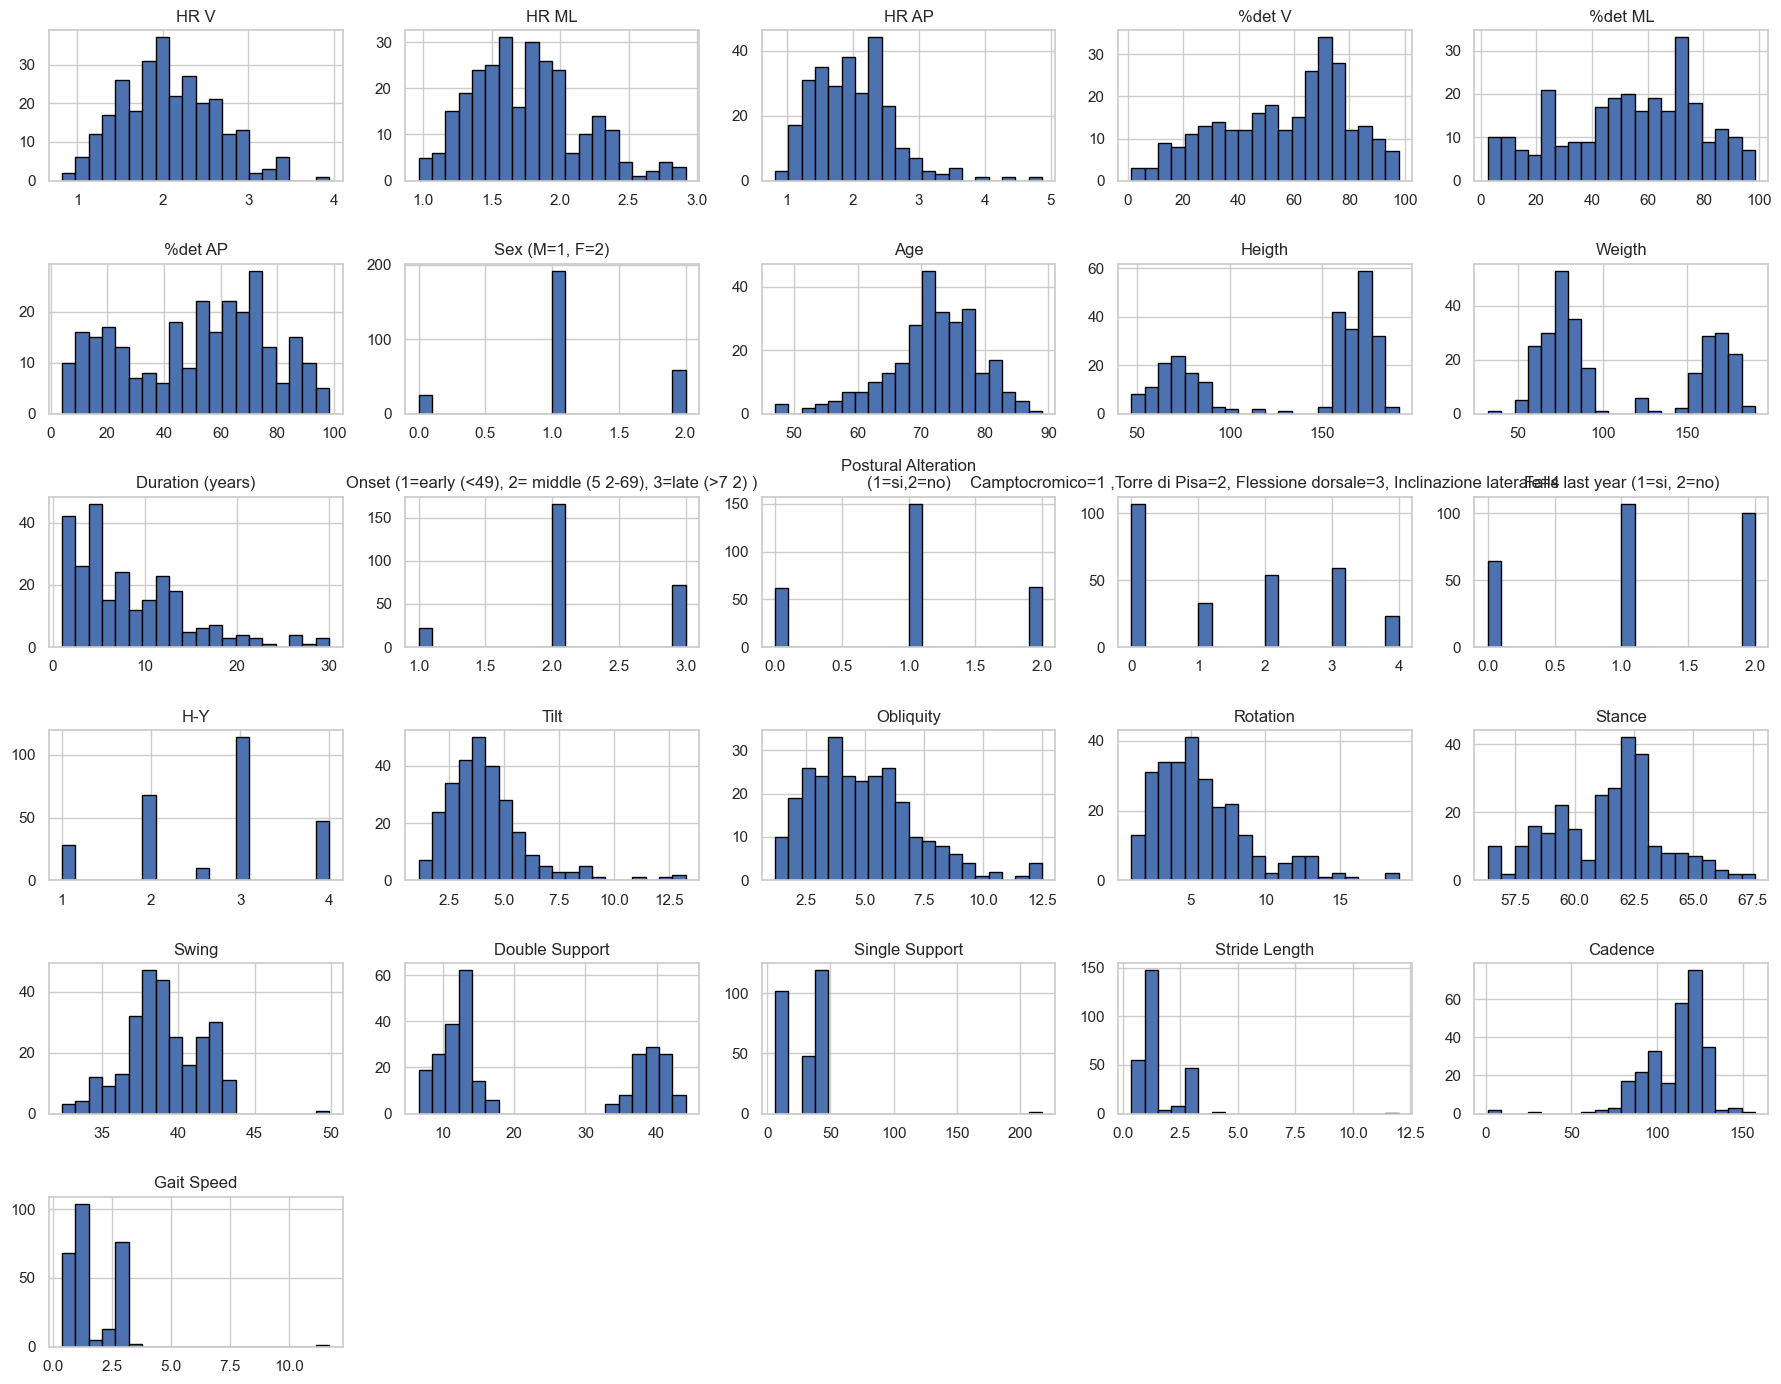

In [9]:
# Istogrammi per tutte le colonne numeriche
df_clean.hist(figsize=(18, 14), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

In [10]:
# Salva versione intermedia del dataset pulito ma ancora con NaN
df_clean.to_csv("../data/processed/data_biomech_raw_with_nan.csv", index=False)

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
df_clean.dtypes[df_clean.dtypes == 'object']

Age Onset    object
LEDD         object
Updrs-III    object
dtype: object

In [15]:
import numpy as np 

cols_to_convert = ['Age Onset', 'LEDD', 'Updrs-III']

for col in cols_to_convert:
    df_clean[col] = (
        df_clean[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .str.replace(" ", "", regex=False)
        .str.replace("-", "", regex=False)
        .replace("nan", np.nan)  # ✅ uso np.nan invece di pd.NA
    )

    # Converto in float in un secondo step (dopo aver sistemato i NaN)
    df_clean[col] = df_clean[col].astype(float)

In [16]:
# 📌 Imputazione dei valori mancanti con mediana
imputer = SimpleImputer(strategy="median")

# Applica l'imputazione e restituisce DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df_clean), columns=df_clean.columns)

In [17]:
# 📐 Normalizzazione (mean=0, std=1) per clustering/GAN
scaler = StandardScaler()

# Applica lo scaling
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

In [18]:
# 💾 Salva il dataset pulito e pronto per clustering/XAI/GAN
df_scaled.to_csv("../data/processed/data_biomech_ready.csv", index=False)